# Data Analysis Project on Zomato 

In [8]:
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv("Zomato data .csv")

In [10]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


convert the data type of column - rate

In [12]:
def handleRate(value):
    value = str(value).split("/")
    value = value[0];
    return float(value)

In [13]:
data["rate"]=data["rate"].apply(handleRate)

In [14]:
data.head()   

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [16]:
data.isnull().any()

name                           False
online_order                   False
book_table                     False
rate                           False
votes                          False
approx_cost(for two people)    False
listed_in(type)                False
dtype: bool

### Type of Restaurant with count

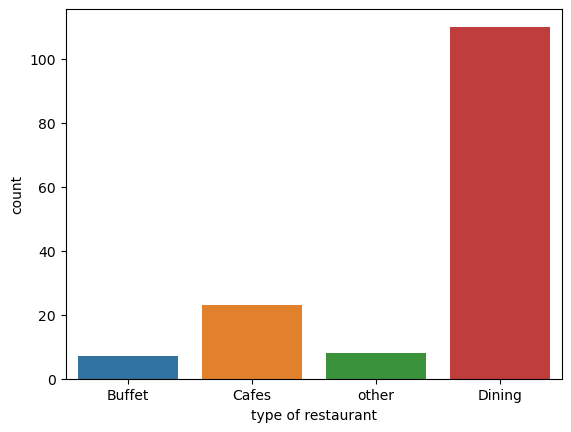

In [20]:
sns.countplot(x=data['listed_in(type)'],hue=data["listed_in(type)"])
plt.xlabel("type of restaurant")
plt.show()

##### conclusion - majority restaurant type is Dining (more than 100)

# votes of restaurant type

Text(0, 0.5, 'count')

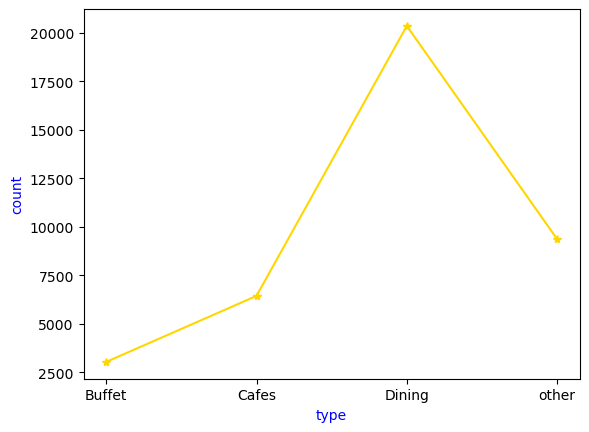

In [31]:
group = data.groupby("listed_in(type)")["votes"].sum()
dresult = pd.DataFrame({"votes":group})
plt.plot(dresult, color = "gold",marker="*")
plt.xlabel("type", c= "blue")
plt.ylabel("count",c="blue")

##### conclusion - dinning restaurant has received maximum voting

# ratings 

Text(0.5, 1.0, 'rating distribution')

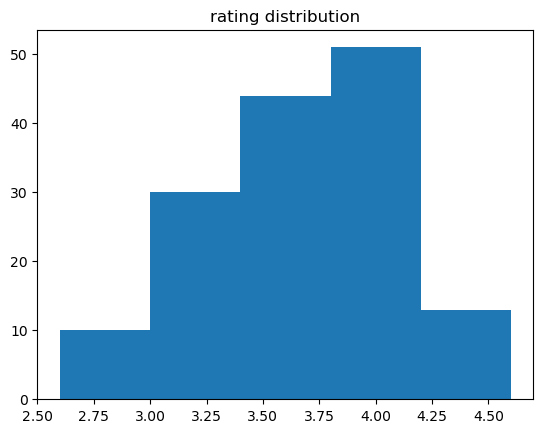

In [35]:
plt.hist(data["rate"],bins= 5)
plt.title("rating distribution")

##### conclusion - the majority restaurant received  3.5 to 4.0 rating 

# average order by spending by couple 👫 

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

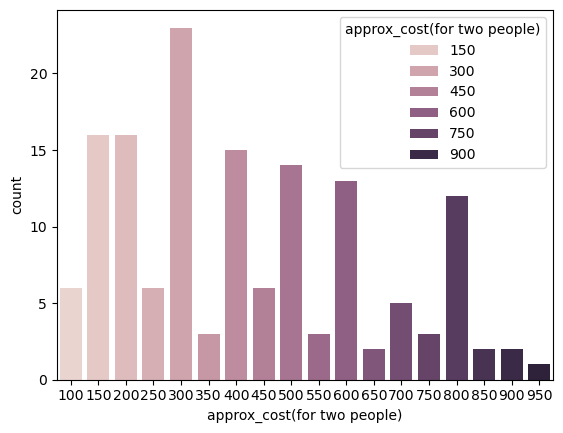

In [39]:
couple_data= data["approx_cost(for two people)"]
sns.countplot(x= couple_data,hue=couple_data)

##### conclusion - the majority of couples prefer approximate cost is around 300

# which mode received maximum ratting 

<Axes: xlabel='online_order', ylabel='rate'>

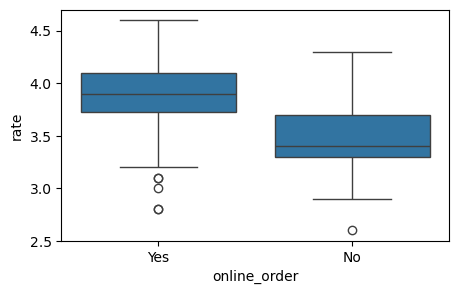

In [43]:
plt.figure(figsize=(5,3))
sns.boxplot(x = 'online_order' , y = 'rate' , data=data)

conclusion - offline order getting lower ratting with comparison to two online ratting

#  heatmap

In [47]:
data.head(1)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet


In [49]:
pivot = data.pivot_table(index="listed_in(type)",columns="online_order", aggfunc="size",fill_value=0)

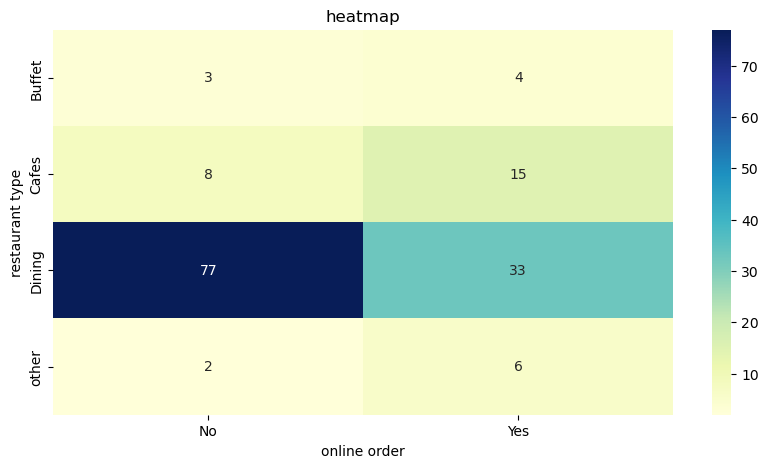

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(pivot,annot=True,cmap="YlGnBu", fmt="d")
plt.title("heatmap")
plt.xlabel('online order')
plt.ylabel('restaurant type')
plt.show()


### colclusion - dinning restaurant primarily accept offline orders.where as cafes primarily accept online orders. this suggests clients preferred offline orders in person at dining restaurant but prefer online order at cafes.